### Generating binary VLE data using Modified UNIFAC 

In [1]:
# Import modules 
import moduni as md
import numpy as np 
import matplotlib.pyplot as plt


In [3]:
md.comp_names

['Acetaldehyde',
 'Acetamide',
 'Acetic acid',
 'Acetic anhydride',
 'Acetone',
 'Acetonitrile',
 'Acetylene',
 'Acrolein',
 'Acrylic acid',
 'Acrylonitrile',
 'Air',
 'Ammonia',
 'Anisole',
 'Argon',
 'Benzamide',
 'Benzene',
 'Benzenethiol',
 'Benzoic acid',
 'Benzonitrile',
 'Benzophenone',
 'Benzyl alcohol',
 'Benzyl ethyl ether',
 'Benzyl mercaptan',
 'Biphenyl',
 'Bromine',
 'Bromobenzene',
 'Bromoethane',
 'Bromomethane',
 '12-Butadiene',
 '13-Butadiene',
 'Butane',
 '12-Butanediol',
 '13-Butanediol',
 '1-Butanol',
 '2-Butanol',
 '1-Butene',
 'cis-2-Butene',
 'trans-2-Butene',
 'Butyl acetate',
 'Butylbenzene',
 'Butyl mercaptan',
 'sec-Butyl mercaptan',
 '1-Butyne',
 'Butyraldehyde',
 'Butyric acid',
 'Butyronitrile',
 'Carbon dioxide',
 'Carbon disulfide',
 'Carbon monoxide',
 'Carbon tetrachloride',
 'Carbon tetrafluoride',
 'Chlorine',
 'Chlorobenzene',
 'Chloroethane',
 'Chloroform',
 'Chloromethane',
 '1-Chloropropane',
 '2-Chloropropane',
 'm-Cresol',
 'o-Cresol',
 'p-Cre

In [6]:
# Create Compounds using UNIFAC subgroups
act = md.Compound('Acetone')
eth = md.Compound('Ethanol')
act.add_groups(1,1) 
act.add_groups(18,1) 
eth.add_groups(1,1) 
eth.add_groups(2,1) 
eth.add_groups(14,1) 

In [7]:
comp = [act,eth] 
params = md.generate_params(comp)

In [8]:
params

(array([0.6325, 1.7048, 0.6325, 1.2302]),
 array([1.0608, 1.67  , 0.7081, 0.8927]),
 array([[1, 1, 0, 0],
        [1, 0, 1, 1]]),
 array([[   0. ,  433.6,    0. , 2777. ],
        [ 199. ,    0. ,  199. ,  653.3],
        [   0. ,  433.6,    0. , 2777. ],
        [1606. , -250. , 1606. ,    0. ]]),
 array([[ 0.    ,  0.1473,  0.    , -4.674 ],
        [-0.8709,  0.    , -0.8709, -1.412 ],
        [ 0.    ,  0.1473,  0.    , -4.674 ],
        [-4.746 ,  2.857 , -4.746 ,  0.    ]]),
 array([[ 0.       ,  0.       ,  0.       ,  0.001551 ],
        [ 0.       ,  0.       ,  0.       ,  0.000954 ],
        [ 0.       ,  0.       ,  0.       ,  0.001551 ],
        [ 0.0009181, -0.006022 ,  0.0009181,  0.       ]]))

In [9]:
# Let us generate isobaric VLE data for Acetone - Ethanol system at 1 atm 
P = 1.01325 # in bar  
T,X,Y = md.generate_binary_VLE_isobaric(P,comp,params) 
# You can control the number of points you want, default is 100 (101 including x=0) 

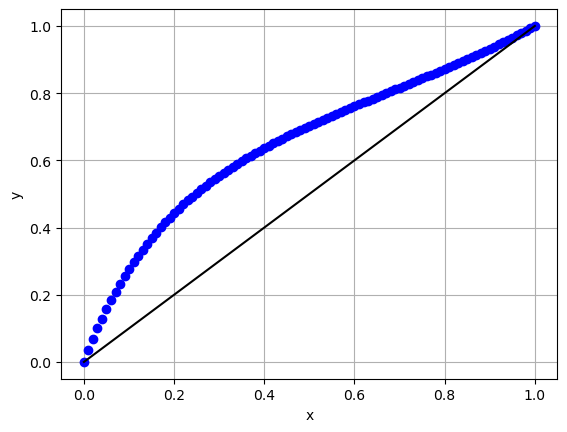

In [10]:
plt.plot(X,Y,'o',color = 'b') 
plt.plot(X,X,'black'); 
plt.xlabel('x') 
plt.ylabel('y') 
plt.grid(); 

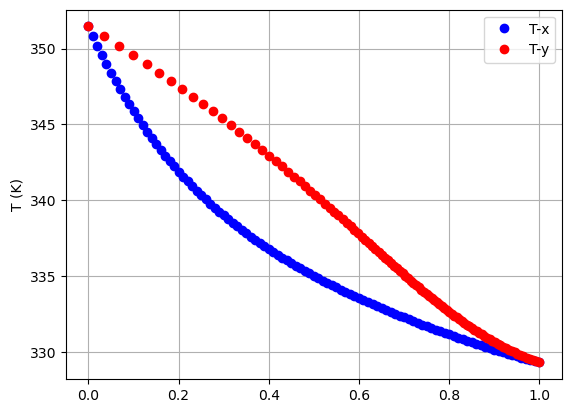

In [11]:
plt.plot(X,T,'o',color = 'b') 
plt.plot(Y,T,'o',color = 'r') 
plt.ylabel('T (K)') 
plt.legend(['T-x','T-y']) 
plt.grid(); 

In [7]:
benz = md.Compound('Benzene') 
benz.add_groups(9,6)

In [8]:
comp_new = [eth,benz] 
params_new = md.generate_params(comp_new) 

In [9]:
# Let us generate isothermal VLE data for Ethanol-Benzene system 
T = 318.15 # in K 

P,x,y = md.generate_binary_VLE_isothermal(T,comp_new,params_new)


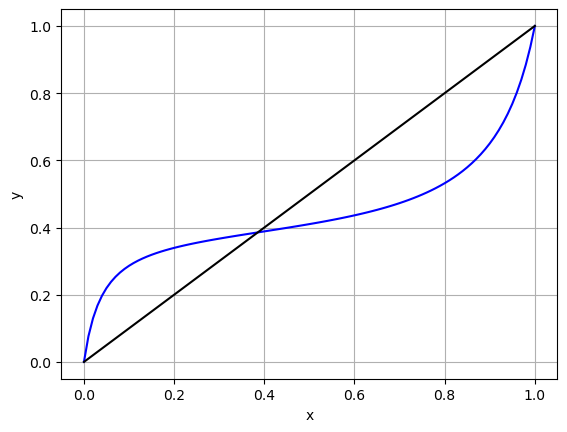

In [10]:
plt.plot(x,y,color = 'b') 
plt.plot(x,x,'black'); 
plt.xlabel('x') 
plt.ylabel('y') 
plt.grid(); 

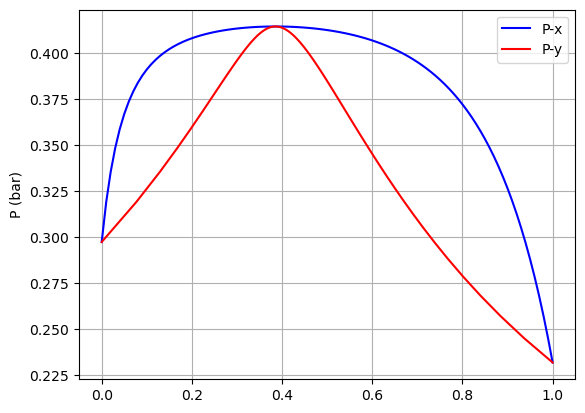

In [11]:
plt.plot(x,P,color = 'b') 
plt.plot(y,P,color = 'r') 
plt.ylabel('P (bar)') 
plt.legend(['P-x','P-y']) 
plt.grid(); 